In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
numb_x_src_path = '../../Dataset/MixedDataSetAdded.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst2.xlsx'

In [3]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [4]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [5]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [6]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [7]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [8]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9459459459459459
Test data score: 0.8928571428571429


In [17]:
NPH = 64
DROPOUT_RATE = 0.5
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='linear'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=50, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/50
4/4 [==============================] - 1s 57ms/step - loss: 1671.9218 - accuracy: 0.3333 - val_loss: 593.5372 - val_accuracy: 0.8214
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 1285.3503 - accuracy: 0.8288 - val_loss: 695.2084 - val_accuracy: 0.8571
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 1741.0994 - accuracy: 0.7027 - val_loss: 473.1410 - val_accuracy: 0.9286
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 987.5026 - accuracy: 0.7838 - val_loss: 429.9216 - val_accuracy: 0.9286
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 576.8635 - accuracy: 0.7658 - val_loss: 551.3550 - val_accuracy: 0.8929
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 593.5510 - accuracy: 0.8288 - val_loss: 193.6007 - val_accuracy: 0.8214
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 483.6835 - accuracy: 0.7748 - val_loss: 225.0745 - val_accuracy: 0.8

In [10]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

In [11]:
# for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
#     print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

In [12]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 25ms/step - loss: 9787.2578 - accuracy: 0.9286
0.9285714030265808


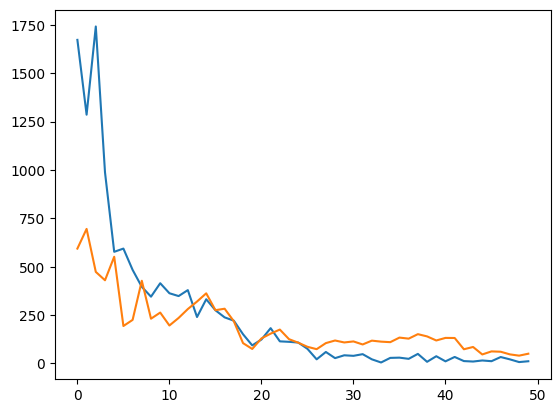

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

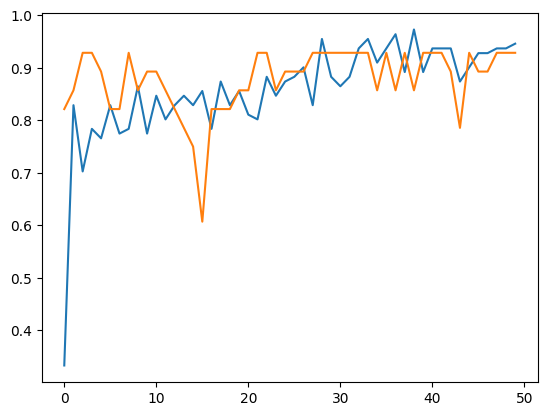

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])